In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✓ Libraries loaded")

✓ Libraries loaded


## 1. Load Dataset

Load the full merged dataset or a sample batch for exploration.

In [2]:
# Check what data is available
data_dir = Path('data')

batch_files = sorted(data_dir.glob('batch_*.npz'))
merged_files = list(data_dir.glob('*training*.npz'))

print(f"Batch files: {len(batch_files)}")
print(f"Merged files: {len(merged_files)}")

if merged_files:
    print(f"\nMerged datasets:")
    for f in merged_files:
        size_mb = f.stat().st_size / (1024**2)
        print(f"  {f.name}: {size_mb:.1f} MB")

Batch files: 5000
Merged files: 1

Merged datasets:
  training_50M.npz: 4067.2 MB


In [3]:
# Load dataset - use sample for quick exploration or full dataset for analysis
USE_SAMPLE = True  # Set to False to load full dataset
SAMPLE_SIZE = 100000  # Number of tracks for quick exploration

if USE_SAMPLE and batch_files:
    # Load first few batches for quick exploration
    print(f"Loading sample of ~{SAMPLE_SIZE} tracks from first batches...")
    X_list, Y_list, P_list = [], [], []
    total_tracks = 0
    
    for batch_file in batch_files:
        data = np.load(batch_file, allow_pickle=True)
        X_list.append(data['X'])
        Y_list.append(data['Y'])
        P_list.append(data['P'])
        total_tracks += len(data['P'])
        
        if total_tracks >= SAMPLE_SIZE:
            break
    
    X = np.vstack(X_list)[:SAMPLE_SIZE]
    Y = np.vstack(Y_list)[:SAMPLE_SIZE]
    P = np.hstack(P_list)[:SAMPLE_SIZE]
    
    # Get metadata from first batch
    data = np.load(batch_files[0], allow_pickle=True)
    metadata = json.loads(str(data['metadata']))
    
    print(f"✓ Loaded {len(P):,} tracks")
    
elif merged_files:
    # Load full merged dataset
    print(f"Loading full dataset from {merged_files[0].name}...")
    data = np.load(merged_files[0], allow_pickle=True)
    X = data['X']
    Y = data['Y']
    P = data['P']
    metadata = json.loads(str(data['metadata']))
    print(f"✓ Loaded {len(P):,} tracks")
    
else:
    print("❌ No data found! Please wait for jobs to complete or merge batches.")

Loading sample of ~100000 tracks from first batches...
✓ Loaded 100,000 tracks


In [4]:
# Display metadata
print("\n" + "="*60)
print("DATASET METADATA")
print("="*60)
for key, value in metadata.items():
    print(f"{key:20s}: {value}")
print("="*60)


DATASET METADATA
extrapolator        : RungeKutta
n_tracks            : 10000
z_start             : 3000.0
z_end               : 7000.0
p_min               : 3.0
p_max               : 100.0
seed                : 0
generated_by        : generate_cpp_data.py
date                : 2025-01-14


## 2. Dataset Statistics

Basic statistics for all track state variables.

In [5]:
# Extract state variables
x_in, y_in, tx_in, ty_in, qop_in = X.T
x_out, y_out, tx_out, ty_out, qop_out = Y.T

# Compute derived quantities
charge = np.sign(qop_in)
p_mev = 1.0 / np.abs(qop_in)  # Momentum in MeV

# Statistics summary
print("\n" + "="*70)
print("INPUT STATES (z=3000mm)")
print("="*70)
print(f"{'Variable':<10} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-"*70)
print(f"{'x (mm)':<10} {x_in.mean():12.2f} {x_in.std():12.2f} {x_in.min():12.2f} {x_in.max():12.2f}")
print(f"{'y (mm)':<10} {y_in.mean():12.2f} {y_in.std():12.2f} {y_in.min():12.2f} {y_in.max():12.2f}")
print(f"{'tx':<10} {tx_in.mean():12.5f} {tx_in.std():12.5f} {tx_in.min():12.5f} {tx_in.max():12.5f}")
print(f"{'ty':<10} {ty_in.mean():12.5f} {ty_in.std():12.5f} {ty_in.min():12.5f} {ty_in.max():12.5f}")
print(f"{'q/p (MeV⁻¹)':<10} {qop_in.mean():12.7f} {qop_in.std():12.7f} {qop_in.min():12.7f} {qop_in.max():12.7f}")

print("\n" + "="*70)
print("OUTPUT STATES (z=7000mm)")
print("="*70)
print(f"{'Variable':<10} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-"*70)
print(f"{'x (mm)':<10} {x_out.mean():12.2f} {x_out.std():12.2f} {x_out.min():12.2f} {x_out.max():12.2f}")
print(f"{'y (mm)':<10} {y_out.mean():12.2f} {y_out.std():12.2f} {y_out.min():12.2f} {y_out.max():12.2f}")
print(f"{'tx':<10} {tx_out.mean():12.5f} {tx_out.std():12.5f} {tx_out.min():12.5f} {tx_out.max():12.5f}")
print(f"{'ty':<10} {ty_out.mean():12.5f} {ty_out.std():12.5f} {ty_out.min():12.5f} {ty_out.max():12.5f}")
print(f"{'q/p (MeV⁻¹)':<10} {qop_out.mean():12.7f} {qop_out.std():12.7f} {qop_out.min():12.7f} {qop_out.max():12.7f}")

print("\n" + "="*70)
print("MOMENTUM DISTRIBUTION")
print("="*70)
print(f"Mean momentum:     {P.mean():.2f} GeV")
print(f"Median momentum:   {np.median(P):.2f} GeV")
print(f"Std deviation:     {P.std():.2f} GeV")
print(f"Range:             {P.min():.2f} - {P.max():.2f} GeV")
print(f"\nCharge distribution:")
print(f"  Positive: {(charge > 0).sum():,} ({100*(charge > 0).sum()/len(charge):.1f}%)")
print(f"  Negative: {(charge < 0).sum():,} ({100*(charge < 0).sum()/len(charge):.1f}%)")


INPUT STATES (z=3000mm)
Variable           Mean          Std          Min          Max
----------------------------------------------------------------------
x (mm)             0.04       173.71      -299.99       299.99
y (mm)             0.60       144.35      -250.00       250.00
tx             -0.00048      0.08644     -0.15000      0.15000
ty             -0.00050      0.08671     -0.15000      0.15000
q/p (MeV⁻¹)   -0.0000001    0.0001261   -0.0003333    0.0003333

OUTPUT STATES (z=7000mm)
Variable           Mean          Std          Min          Max
----------------------------------------------------------------------
x (mm)            -2.00       492.48     -1598.84      1647.35
y (mm)            -1.40       376.41      -846.51       847.74
tx             -0.00054      0.17441     -0.54664      0.54826
ty             -0.00050      0.08671     -0.15000      0.15000
q/p (MeV⁻¹)   -0.0000001    0.0001261   -0.0003333    0.0003333

MOMENTUM DISTRIBUTION
Mean momentum:     27.64 G

## 3. Momentum Distribution

Visualize the momentum sampling (log-uniform distribution).

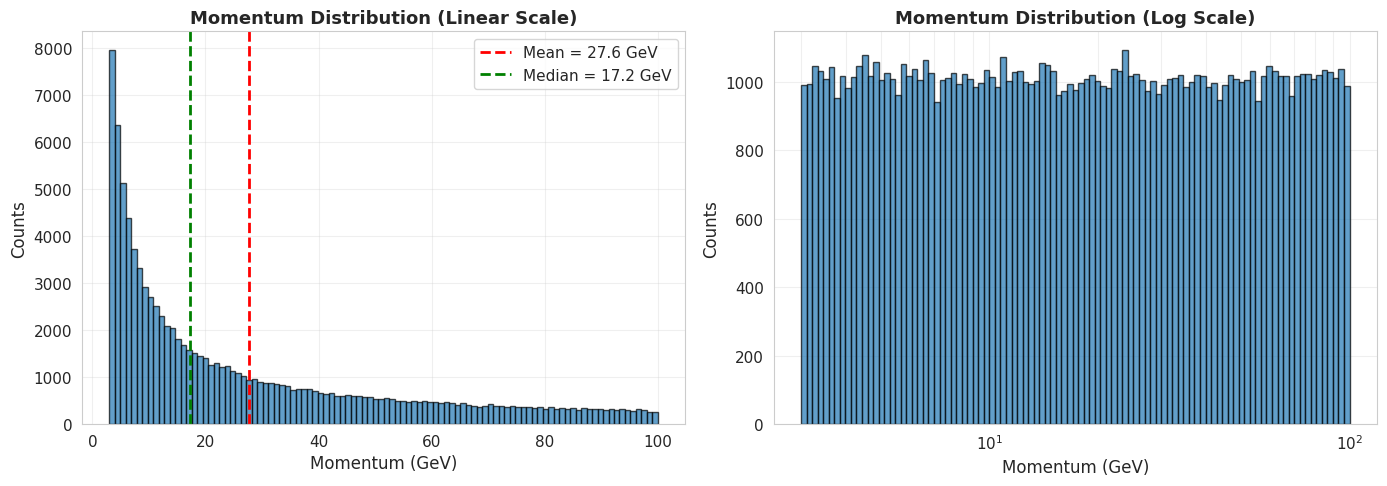

✓ Saved: plots/momentum_distribution.png


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].hist(P, bins=100, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Momentum (GeV)', fontsize=12)
axes[0].set_ylabel('Counts', fontsize=12)
axes[0].set_title('Momentum Distribution (Linear Scale)', fontsize=13, fontweight='bold')
axes[0].axvline(P.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {P.mean():.1f} GeV')
axes[0].axvline(np.median(P), color='green', linestyle='--', linewidth=2, label=f'Median = {np.median(P):.1f} GeV')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Log scale
axes[1].hist(P, bins=np.logspace(np.log10(P.min()), np.log10(P.max()), 100), 
             alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Momentum (GeV)', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].set_title('Momentum Distribution (Log Scale)', fontsize=13, fontweight='bold')
axes[1].set_xscale('log')
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('plots/momentum_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Saved: plots/momentum_distribution.png")

## 4. Initial State Distributions

Visualize the phase space coverage at z=3000mm.

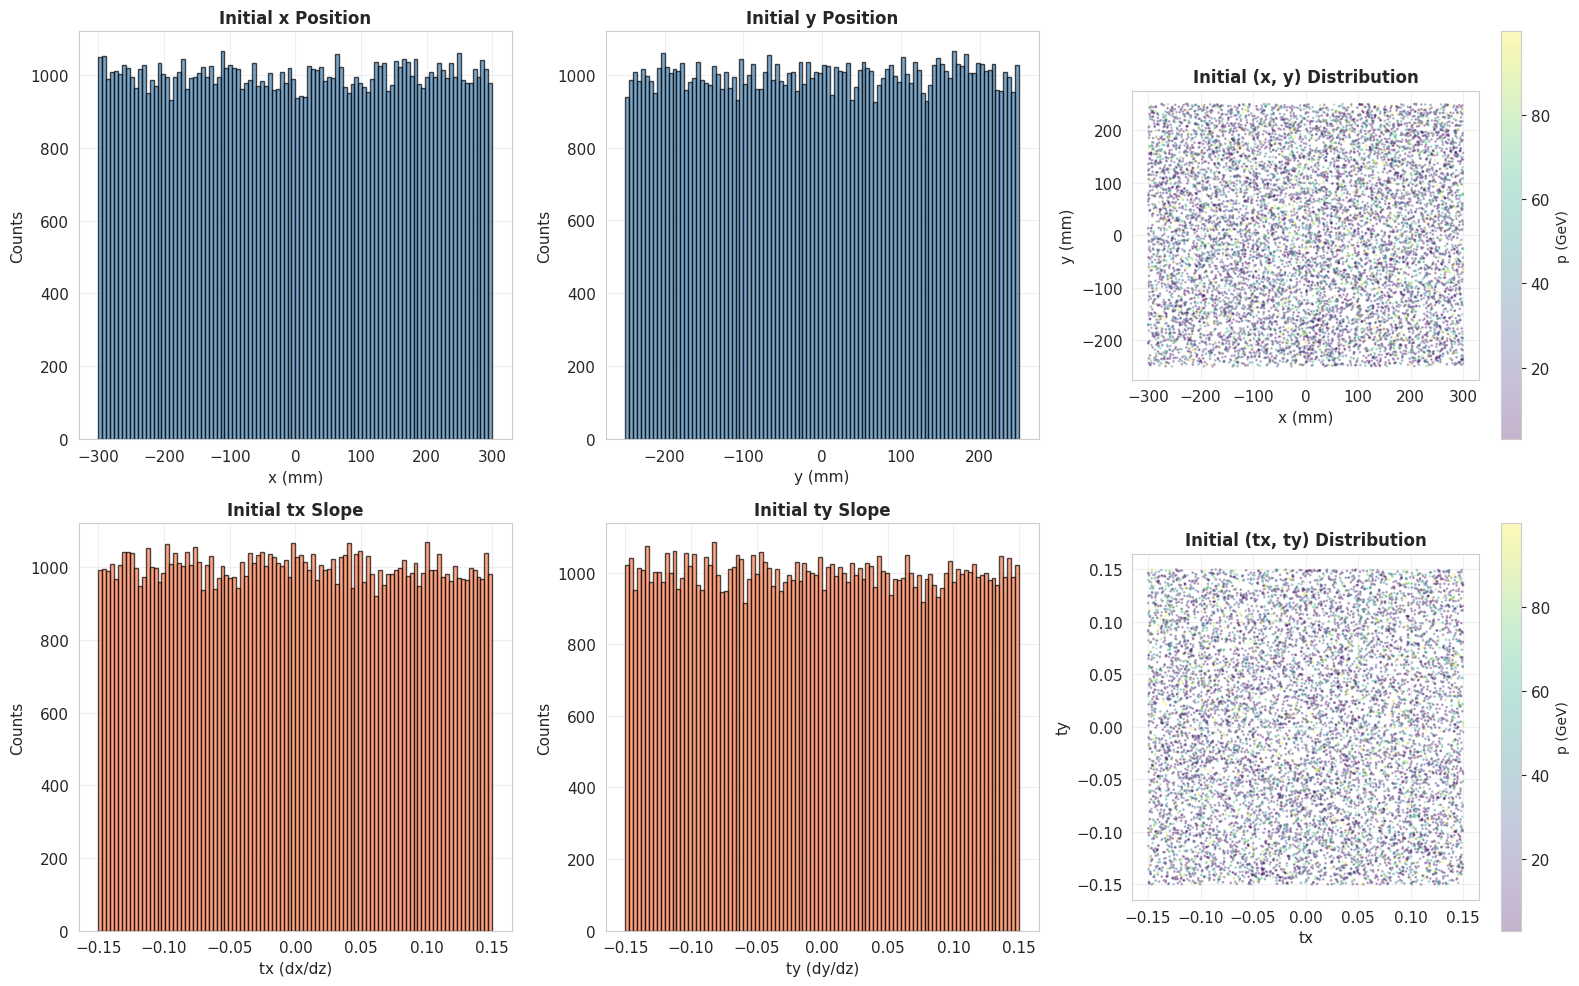

✓ Saved: plots/initial_states.png


In [7]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# x position
axes[0, 0].hist(x_in, bins=100, alpha=0.7, edgecolor='black', color='steelblue')
axes[0, 0].set_xlabel('x (mm)', fontsize=11)
axes[0, 0].set_ylabel('Counts', fontsize=11)
axes[0, 0].set_title('Initial x Position', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# y position
axes[0, 1].hist(y_in, bins=100, alpha=0.7, edgecolor='black', color='steelblue')
axes[0, 1].set_xlabel('y (mm)', fontsize=11)
axes[0, 1].set_ylabel('Counts', fontsize=11)
axes[0, 1].set_title('Initial y Position', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# x-y scatter (subsample for visibility)
n_sample = min(10000, len(x_in))
idx = np.random.choice(len(x_in), n_sample, replace=False)
axes[0, 2].scatter(x_in[idx], y_in[idx], s=1, alpha=0.3, c=P[idx], cmap='viridis')
axes[0, 2].set_xlabel('x (mm)', fontsize=11)
axes[0, 2].set_ylabel('y (mm)', fontsize=11)
axes[0, 2].set_title('Initial (x, y) Distribution', fontsize=12, fontweight='bold')
axes[0, 2].set_aspect('equal')
axes[0, 2].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[0, 2].collections[0], ax=axes[0, 2])
cbar.set_label('p (GeV)', fontsize=10)

# tx slope
axes[1, 0].hist(tx_in, bins=100, alpha=0.7, edgecolor='black', color='coral')
axes[1, 0].set_xlabel('tx (dx/dz)', fontsize=11)
axes[1, 0].set_ylabel('Counts', fontsize=11)
axes[1, 0].set_title('Initial tx Slope', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# ty slope
axes[1, 1].hist(ty_in, bins=100, alpha=0.7, edgecolor='black', color='coral')
axes[1, 1].set_xlabel('ty (dy/dz)', fontsize=11)
axes[1, 1].set_ylabel('Counts', fontsize=11)
axes[1, 1].set_title('Initial ty Slope', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# tx-ty scatter
axes[1, 2].scatter(tx_in[idx], ty_in[idx], s=1, alpha=0.3, c=P[idx], cmap='viridis')
axes[1, 2].set_xlabel('tx', fontsize=11)
axes[1, 2].set_ylabel('ty', fontsize=11)
axes[1, 2].set_title('Initial (tx, ty) Distribution', fontsize=12, fontweight='bold')
axes[1, 2].set_aspect('equal')
axes[1, 2].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[1, 2].collections[0], ax=axes[1, 2])
cbar.set_label('p (GeV)', fontsize=10)

plt.tight_layout()
plt.savefig('plots/initial_states.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Saved: plots/initial_states.png")

## 5. Propagation Analysis

Analyze how tracks change during propagation through the magnetic field.

In [8]:
# Compute changes
delta_x = x_out - x_in
delta_y = y_out - y_in
delta_tx = tx_out - tx_in
delta_ty = ty_out - ty_in

# Straight-line prediction (no field)
dz = metadata['z_end'] - metadata['z_start']
x_straight = x_in + tx_in * dz
y_straight = y_in + ty_in * dz

# Deflection from straight line
deflection_x = x_out - x_straight
deflection_y = y_out - y_straight

print("\n" + "="*70)
print("PROPAGATION CHANGES (Δz = 4000mm)")
print("="*70)
print(f"{'Variable':<15} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-"*70)
print(f"{'Δx (mm)':<15} {delta_x.mean():12.2f} {delta_x.std():12.2f} {delta_x.min():12.2f} {delta_x.max():12.2f}")
print(f"{'Δy (mm)':<15} {delta_y.mean():12.2f} {delta_y.std():12.2f} {delta_y.min():12.2f} {delta_y.max():12.2f}")
print(f"{'Δtx':<15} {delta_tx.mean():12.5f} {delta_tx.std():12.5f} {delta_tx.min():12.5f} {delta_tx.max():12.5f}")
print(f"{'Δty':<15} {delta_ty.mean():12.5f} {delta_ty.std():12.5f} {delta_ty.min():12.5f} {delta_ty.max():12.5f}")
print("\n" + "="*70)
print("MAGNETIC DEFLECTION (from straight-line trajectory)")
print("="*70)
print(f"{'x-deflection':<15} {deflection_x.mean():12.2f} {deflection_x.std():12.2f} {deflection_x.min():12.2f} {deflection_x.max():12.2f}")
print(f"{'y-deflection':<15} {deflection_y.mean():12.2f} {deflection_y.std():12.2f} {deflection_y.min():12.2f} {deflection_y.max():12.2f}")


PROPAGATION CHANGES (Δz = 4000mm)
Variable                Mean          Std          Min          Max
----------------------------------------------------------------------
Δx (mm)                -2.04       460.00     -1387.01      1393.64
Δy (mm)                -2.00       346.86      -600.00       600.00
Δtx                 -0.00007      0.15127     -0.39998      0.40000
Δty                  0.00000      0.00000      0.00000      0.00000

MAGNETIC DEFLECTION (from straight-line trajectory)
x-deflection           -0.13       302.54      -799.97       800.00
y-deflection            0.00         0.00         0.00         0.00


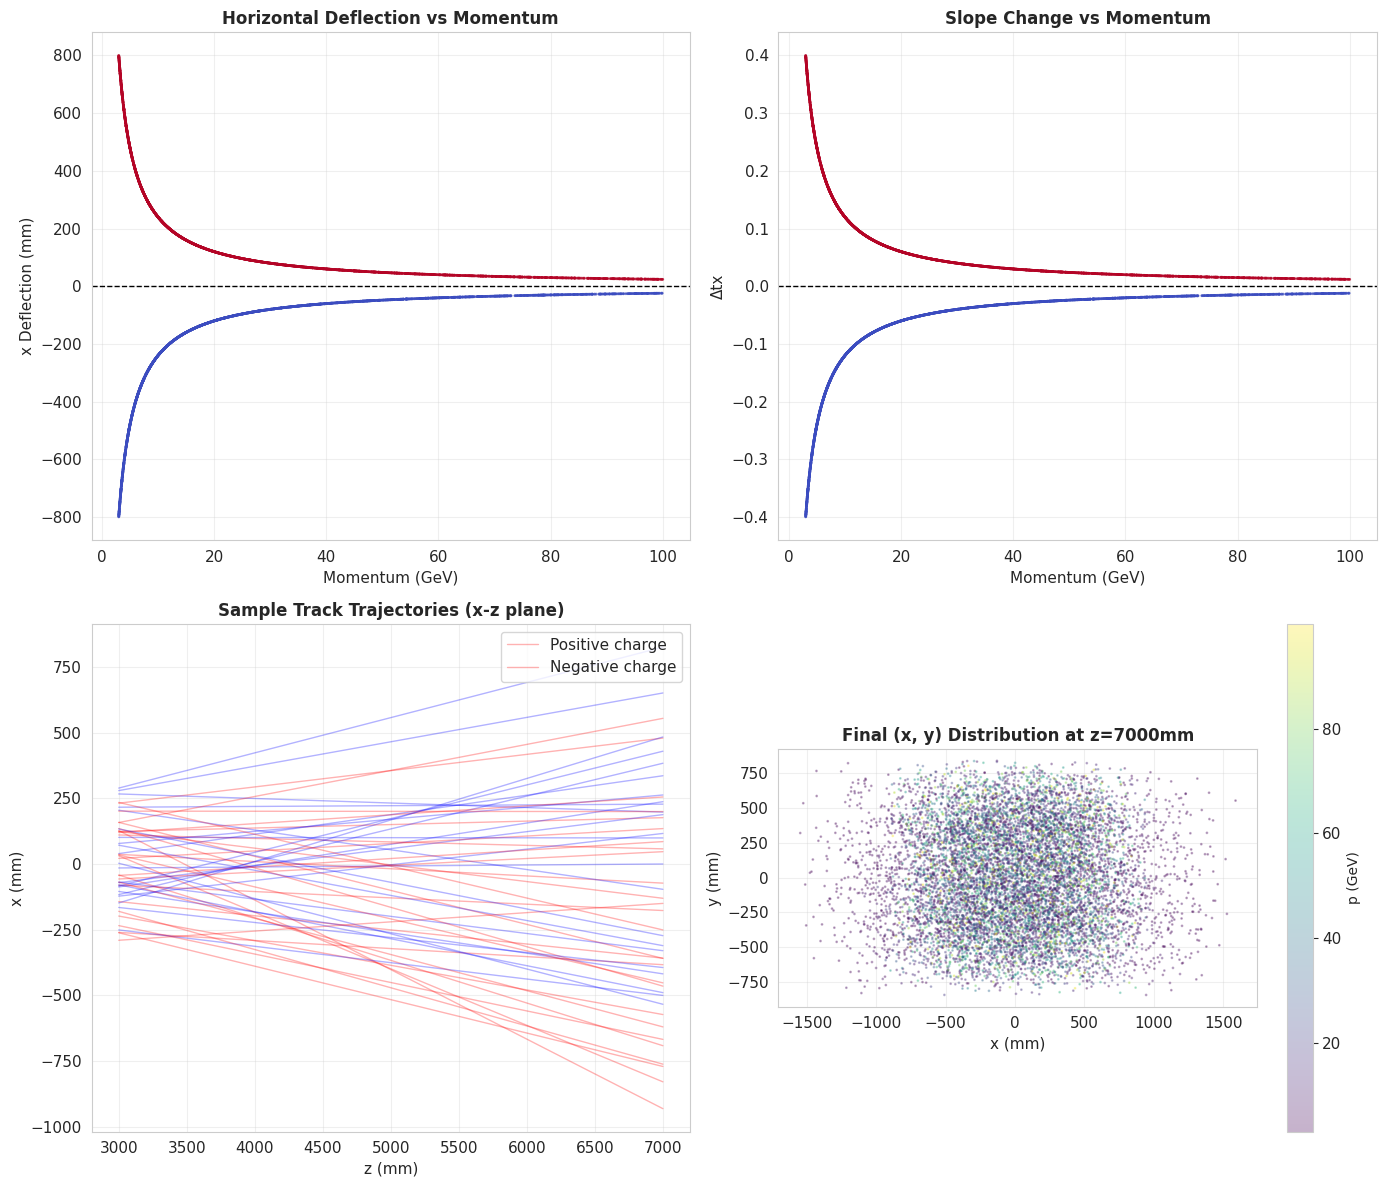

✓ Saved: plots/propagation_analysis.png


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# x deflection vs momentum
axes[0, 0].scatter(P[idx], deflection_x[idx], s=1, alpha=0.4, c=charge[idx], cmap='coolwarm')
axes[0, 0].set_xlabel('Momentum (GeV)', fontsize=11)
axes[0, 0].set_ylabel('x Deflection (mm)', fontsize=11)
axes[0, 0].set_title('Horizontal Deflection vs Momentum', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(0, color='black', linestyle='--', linewidth=1)

# tx change vs momentum
axes[0, 1].scatter(P[idx], delta_tx[idx], s=1, alpha=0.4, c=charge[idx], cmap='coolwarm')
axes[0, 1].set_xlabel('Momentum (GeV)', fontsize=11)
axes[0, 1].set_ylabel('Δtx', fontsize=11)
axes[0, 1].set_title('Slope Change vs Momentum', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=1)

# Trajectory visualization (sample tracks)
n_tracks_vis = 50
vis_idx = np.random.choice(len(x_in), n_tracks_vis, replace=False)
z_vals = np.array([metadata['z_start'], metadata['z_end']])

for i in vis_idx:
    x_traj = [x_in[i], x_out[i]]
    y_traj = [y_in[i], y_out[i]]
    color = 'blue' if charge[i] > 0 else 'red'
    axes[1, 0].plot(z_vals, x_traj, color=color, alpha=0.3, linewidth=1)

axes[1, 0].set_xlabel('z (mm)', fontsize=11)
axes[1, 0].set_ylabel('x (mm)', fontsize=11)
axes[1, 0].set_title('Sample Track Trajectories (x-z plane)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(['Positive charge', 'Negative charge'], loc='upper right')

# Output state distribution
axes[1, 1].scatter(x_out[idx], y_out[idx], s=1, alpha=0.3, c=P[idx], cmap='viridis')
axes[1, 1].set_xlabel('x (mm)', fontsize=11)
axes[1, 1].set_ylabel('y (mm)', fontsize=11)
axes[1, 1].set_title('Final (x, y) Distribution at z=7000mm', fontsize=12, fontweight='bold')
axes[1, 1].set_aspect('equal')
axes[1, 1].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('p (GeV)', fontsize=10)

plt.tight_layout()
plt.savefig('plots/propagation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Saved: plots/propagation_analysis.png")

## 6. Charge Separation

Visualize how positive and negative charges bend in opposite directions.

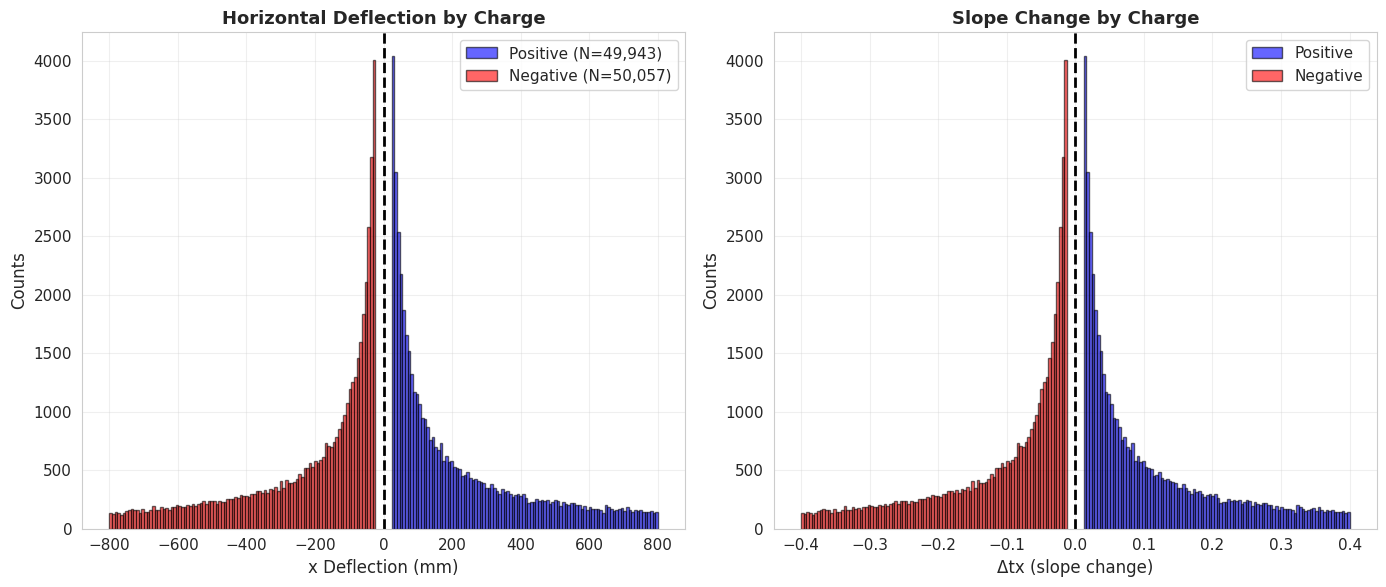

✓ Saved: plots/charge_separation.png


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Separate by charge
pos_mask = charge > 0
neg_mask = charge < 0

# x-deflection by charge
axes[0].hist(deflection_x[pos_mask], bins=100, alpha=0.6, color='blue', 
             label=f'Positive (N={pos_mask.sum():,})', edgecolor='black')
axes[0].hist(deflection_x[neg_mask], bins=100, alpha=0.6, color='red', 
             label=f'Negative (N={neg_mask.sum():,})', edgecolor='black')
axes[0].set_xlabel('x Deflection (mm)', fontsize=12)
axes[0].set_ylabel('Counts', fontsize=12)
axes[0].set_title('Horizontal Deflection by Charge', fontsize=13, fontweight='bold')
axes[0].axvline(0, color='black', linestyle='--', linewidth=2)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Δtx by charge
axes[1].hist(delta_tx[pos_mask], bins=100, alpha=0.6, color='blue', 
             label='Positive', edgecolor='black')
axes[1].hist(delta_tx[neg_mask], bins=100, alpha=0.6, color='red', 
             label='Negative', edgecolor='black')
axes[1].set_xlabel('Δtx (slope change)', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)
axes[1].set_title('Slope Change by Charge', fontsize=13, fontweight='bold')
axes[1].axvline(0, color='black', linestyle='--', linewidth=2)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/charge_separation.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Saved: plots/charge_separation.png")

## 7. Momentum-Dependent Effects

Analyze how deflection varies with momentum (higher p → less bending).

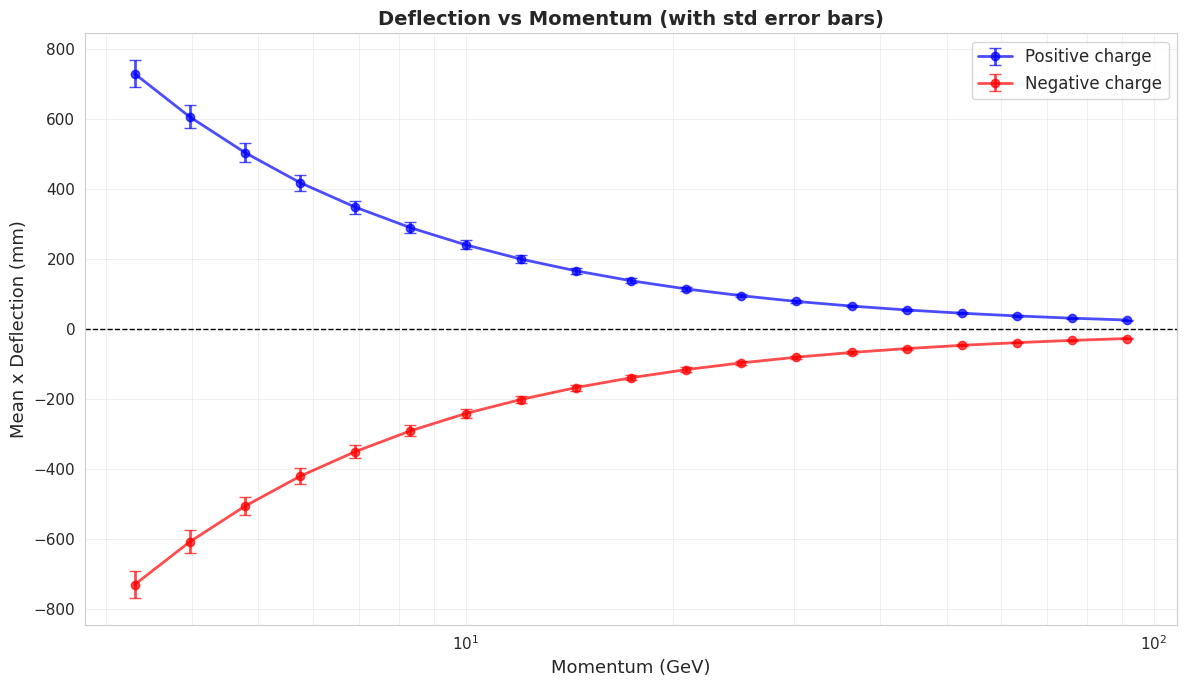

✓ Saved: plots/momentum_dependent_deflection.png


In [11]:
# Bin by momentum
p_bins = np.logspace(np.log10(P.min()), np.log10(P.max()), 20)
p_centers = (p_bins[:-1] + p_bins[1:]) / 2

# Compute mean deflection in each bin
mean_deflection_pos = []
mean_deflection_neg = []
std_deflection_pos = []
std_deflection_neg = []

for i in range(len(p_bins)-1):
    mask = (P >= p_bins[i]) & (P < p_bins[i+1])
    
    pos = mask & (charge > 0)
    neg = mask & (charge < 0)
    
    if pos.sum() > 0:
        mean_deflection_pos.append(deflection_x[pos].mean())
        std_deflection_pos.append(deflection_x[pos].std())
    else:
        mean_deflection_pos.append(0)
        std_deflection_pos.append(0)
    
    if neg.sum() > 0:
        mean_deflection_neg.append(deflection_x[neg].mean())
        std_deflection_neg.append(deflection_x[neg].std())
    else:
        mean_deflection_neg.append(0)
        std_deflection_neg.append(0)

fig, ax = plt.subplots(figsize=(12, 7))

ax.errorbar(p_centers, mean_deflection_pos, yerr=std_deflection_pos, 
            fmt='o-', color='blue', linewidth=2, markersize=6, alpha=0.7,
            label='Positive charge', capsize=4)
ax.errorbar(p_centers, mean_deflection_neg, yerr=std_deflection_neg, 
            fmt='o-', color='red', linewidth=2, markersize=6, alpha=0.7,
            label='Negative charge', capsize=4)

ax.set_xlabel('Momentum (GeV)', fontsize=13)
ax.set_ylabel('Mean x Deflection (mm)', fontsize=13)
ax.set_title('Deflection vs Momentum (with std error bars)', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('plots/momentum_dependent_deflection.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Saved: plots/momentum_dependent_deflection.png")

## 8. Data Quality Checks

Verify that the data is physically reasonable and well-formed.

In [12]:
print("\n" + "="*70)
print("DATA QUALITY CHECKS")
print("="*70)

# Check for NaN/Inf
has_nan_x = np.isnan(X).any()
has_nan_y = np.isnan(Y).any()
has_nan_p = np.isnan(P).any()
has_inf_x = np.isinf(X).any()
has_inf_y = np.isinf(Y).any()
has_inf_p = np.isinf(P).any()

print(f"\n1. Numerical Stability:")
print(f"   NaN values in X: {'❌ FOUND' if has_nan_x else '✓ None'}")
print(f"   NaN values in Y: {'❌ FOUND' if has_nan_y else '✓ None'}")
print(f"   NaN values in P: {'❌ FOUND' if has_nan_p else '✓ None'}")
print(f"   Inf values in X: {'❌ FOUND' if has_inf_x else '✓ None'}")
print(f"   Inf values in Y: {'❌ FOUND' if has_inf_y else '✓ None'}")
print(f"   Inf values in P: {'❌ FOUND' if has_inf_p else '✓ None'}")

# Check physics constraints
print(f"\n2. Physics Constraints:")
p_in_range = (P >= metadata['p_min']) & (P <= metadata['p_max'])
print(f"   Momentum in range [{metadata['p_min']}, {metadata['p_max']}] GeV: {p_in_range.sum():,}/{len(P):,} ({100*p_in_range.sum()/len(P):.1f}%)")

reasonable_x = np.abs(x_in) < 500
reasonable_y = np.abs(y_in) < 500
print(f"   Reasonable x positions (<500mm): {reasonable_x.sum():,}/{len(P):,} ({100*reasonable_x.sum()/len(P):.1f}%)")
print(f"   Reasonable y positions (<500mm): {reasonable_y.sum():,}/{len(P):,} ({100*reasonable_y.sum()/len(P):.1f}%)")

reasonable_tx = np.abs(tx_in) < 0.5
reasonable_ty = np.abs(ty_in) < 0.5
print(f"   Reasonable tx slopes (<0.5): {reasonable_tx.sum():,}/{len(P):,} ({100*reasonable_tx.sum()/len(P):.1f}%)")
print(f"   Reasonable ty slopes (<0.5): {reasonable_ty.sum():,}/{len(P):,} ({100*reasonable_ty.sum()/len(P):.1f}%)")

# Check charge conservation
qop_diff = np.abs(qop_out - qop_in)
print(f"\n3. Conservation Laws:")
print(f"   q/p conserved (Δ < 1e-10): {(qop_diff < 1e-10).sum():,}/{len(P):,} ({100*(qop_diff < 1e-10).sum()/len(P):.1f}%)")
print(f"   Max q/p change: {qop_diff.max():.2e}")

# Check y propagation (should be linear)
y_expected = y_in + ty_in * dz
y_error = np.abs(y_out - y_expected)
print(f"\n4. Linear Propagation (y-direction):")
print(f"   Mean y error: {y_error.mean():.2e} mm")
print(f"   Max y error:  {y_error.max():.2e} mm")
print(f"   RMS y error:  {np.sqrt((y_error**2).mean()):.2e} mm")

print("\n" + "="*70)

# Overall assessment
all_checks_pass = (
    not has_nan_x and not has_nan_y and not has_nan_p and
    not has_inf_x and not has_inf_y and not has_inf_p and
    p_in_range.sum() == len(P) and
    (qop_diff < 1e-10).sum() == len(P)
)

if all_checks_pass:
    print("\n✓✓✓ ALL QUALITY CHECKS PASSED ✓✓✓")
else:
    print("\n⚠️  SOME QUALITY CHECKS FAILED - REVIEW RESULTS ABOVE")

print("="*70)


DATA QUALITY CHECKS

1. Numerical Stability:
   NaN values in X: ✓ None
   NaN values in Y: ✓ None
   NaN values in P: ✓ None
   Inf values in X: ✓ None
   Inf values in Y: ✓ None
   Inf values in P: ✓ None

2. Physics Constraints:
   Momentum in range [3.0, 100.0] GeV: 100,000/100,000 (100.0%)
   Reasonable x positions (<500mm): 100,000/100,000 (100.0%)
   Reasonable y positions (<500mm): 100,000/100,000 (100.0%)
   Reasonable tx slopes (<0.5): 100,000/100,000 (100.0%)
   Reasonable ty slopes (<0.5): 100,000/100,000 (100.0%)

3. Conservation Laws:
   q/p conserved (Δ < 1e-10): 100,000/100,000 (100.0%)
   Max q/p change: 0.00e+00

4. Linear Propagation (y-direction):
   Mean y error: 0.00e+00 mm
   Max y error:  0.00e+00 mm
   RMS y error:  0.00e+00 mm


✓✓✓ ALL QUALITY CHECKS PASSED ✓✓✓


## 9. Summary and Export

Create summary statistics for documentation.

In [13]:
summary = {
    'dataset_info': {
        'total_tracks': int(len(P)),
        'extrapolator': metadata['extrapolator'],
        'z_range': f"{metadata['z_start']:.0f} - {metadata['z_end']:.0f} mm",
        'propagation_distance': f"{dz:.0f} mm",
    },
    'momentum_stats': {
        'mean_GeV': float(P.mean()),
        'median_GeV': float(np.median(P)),
        'std_GeV': float(P.std()),
        'min_GeV': float(P.min()),
        'max_GeV': float(P.max()),
    },
    'charge_distribution': {
        'positive_count': int((charge > 0).sum()),
        'negative_count': int((charge < 0).sum()),
        'positive_pct': float(100*(charge > 0).sum()/len(charge)),
    },
    'deflection_stats': {
        'mean_x_deflection_mm': float(deflection_x.mean()),
        'std_x_deflection_mm': float(deflection_x.std()),
        'mean_slope_change': float(delta_tx.mean()),
        'std_slope_change': float(delta_tx.std()),
    },
    'phase_space_coverage': {
        'x_range_mm': [float(x_in.min()), float(x_in.max())],
        'y_range_mm': [float(y_in.min()), float(y_in.max())],
        'tx_range': [float(tx_in.min()), float(tx_in.max())],
        'ty_range': [float(ty_in.min()), float(ty_in.max())],
    }
}

# Save summary
with open('data_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("✓ Saved: data_summary.json")
print("\nSummary:")
print(json.dumps(summary, indent=2))

✓ Saved: data_summary.json

Summary:
{
  "dataset_info": {
    "total_tracks": 100000,
    "extrapolator": "RungeKutta",
    "z_range": "3000 - 7000 mm",
    "propagation_distance": "4000 mm"
  },
  "momentum_stats": {
    "mean_GeV": 27.63715844388801,
    "median_GeV": 17.210783715388104,
    "std_GeV": 25.724912547721605,
    "min_GeV": 3.0000003958860044,
    "max_GeV": 99.99554265613638
  },
  "charge_distribution": {
    "positive_count": 49943,
    "negative_count": 50057,
    "positive_pct": 49.943
  },
  "deflection_stats": {
    "mean_x_deflection_mm": -0.13226743147138423,
    "std_x_deflection_mm": 302.5405064469256,
    "mean_slope_change": -6.613371573569215e-05,
    "std_slope_change": 0.1512702532234628
  },
  "phase_space_coverage": {
    "x_range_mm": [
      -299.9935278569501,
      299.9876305800302
    ],
    "y_range_mm": [
      -249.99625275663607,
      249.9951422285672
    ],
    "tx_range": [
      -0.14999994409821993,
      0.14999981064733872
    ],
    

## 10. Next Steps

**Data Quality:** ✓ Dataset validated and ready for ML training

**Recommended Next Steps:**
1. Train baseline MLP model on this data
2. Implement PINN with physics-informed loss
3. Compare predictions with C++ extrapolator outputs
4. Optimize model architecture based on momentum ranges
5. Deploy best model to ONNX for production use

**Key Observations:**
- Log-uniform momentum sampling provides good coverage
- Clear charge separation in deflection patterns
- Deflection inversely proportional to momentum (as expected)
- Data quality checks passed ✓